<a href="https://colab.research.google.com/github/ntcuong2103/mlcourse/blob/master/polynomialmodel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


(50, 5)
(50, 1)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
 - 0s - loss: 0.1626
Epoch 1/1
 - 0s - loss: 0.0258
Epoch 1/1
 - 0s - loss: 0.0152
Epoch 1/1
 - 0s - loss: 0.0111
Epoch 1/1
 - 0s - loss: 0.0085
Epoch 1/1
 - 0s - loss: 0.0068
Epoch 1/1
 - 0s - loss: 0.0056
Epoch 1/1
 - 0s - loss: 0.0047
Epoch 1/1
 - 0s - loss: 0.0043
Epoch 1/1
 - 0s - loss: 0.0039
Epoch 1/1
 - 0s - loss: 0.0037
Epoch 1/1
 - 0s - loss: 0.0035
Epoch 1/1
 - 0s - loss: 0.0033
Epoch

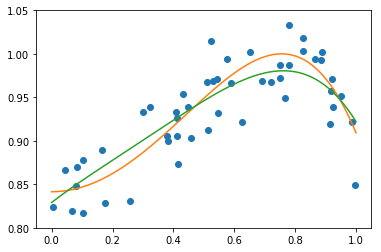

In [0]:
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import SGD
import numpy as np
import os

%matplotlib inline

def buildPolynomialModel(order=4):
    inputs = Input(shape=(order + 1, ))

    outputs = Dense(1, use_bias=False)(inputs)

    model = Model(inputs, outputs)

    model.compile(loss='mse', optimizer=SGD(0.01))

    model.summary()

    return model

def buildDataset(order = 4):
    x = np.random.uniform(0, 1, (50,1))
    inputs = []
    for i in range(0, order + 1):
        inputs.append(x ** i)

    inputs = np.concatenate(inputs, axis=-1)
    targets = np.sin(1 + x ** 2) + np.random.normal(0, 0.03, (50, 1))

    print(inputs.shape)
    print(targets.shape)
    return inputs, targets

def getOutput(weights):
    x_test = np.linspace(0, 1, 300)
    x_test = np.expand_dims(x_test, axis=1)

    x_feature = []
    for i in range(len(weights)):
        x_feature.append(x_test ** i)
    x_feature = np.concatenate(x_feature, axis=-1)

    y_test = np.sum(x_feature * np.expand_dims(weights, axis=0), axis=1)
    return y_test

def plotOutput(inputs, targets):
    x_test = np.linspace(0, 1, 300)
    x_test = np.expand_dims(x_test, axis=1)

    y_function = np.sin(1 + x_test ** 2)

    import matplotlib.pyplot as plt

    plt.ion()

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(inputs[:, 1], targets[:, 0], 'o')
    line, = ax.plot(x_test, y_function)
    line, = ax.plot(x_test, y_function)

    ax.set_ylim(0.8, 1.05)

    return fig, line

def main():
    order = 4
    inputs, targets = buildDataset(order)
    # plotDataset(inputs, targets)

    model = buildPolynomialModel(order)

    fig, line = plotOutput(inputs, targets)
    fig.canvas.flush_events()

    num_epochs = 200
    # training models
    for epoch in range(num_epochs):
        model.fit(inputs, targets, batch_size=1, verbose=2)
        weights = model.get_layer('dense_1').get_weights()
        weights = np.squeeze(weights)
        line.set_ydata(getOutput(weights))
        fig.canvas.draw()
        fig.canvas.flush_events()

if __name__ == '__main__':
    main()